In [28]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
len(train_labels)

60000

In [31]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
 len(test_labels)

10000

In [34]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [36]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [38]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2547 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1034 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0500 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0376 - accuracy: 0.9887


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.9783


> 90.758
> 91.117
> 91.100
> 90.867
> 90.725


C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


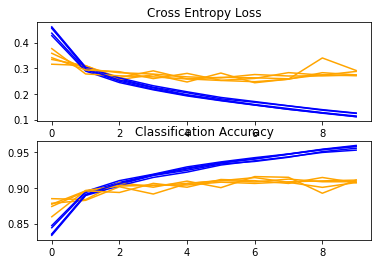

Accuracy: mean=90.913 std=0.166, n=5


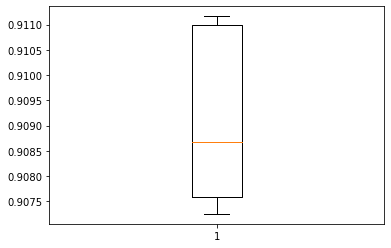

In [14]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
        scores, histories = list(), list()
        # prepare cross validation
        kfold = KFold(n_folds, shuffle=True, random_state=1)
        # enumerate splits
        for train_ix, test_ix in kfold.split(dataX):
            # define model
            model = define_model()
            # select rows for train and test
            trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
            # fit model
            history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
            # evaluate model
            _, acc = model.evaluate(testX, testY, verbose=0)
            print('> %.3f' % (acc * 100.0))
            # append scores
            scores.append(acc)
            histories.append(history)
        return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
        for i in range(len(histories)):
            # plot loss
            pyplot.subplot(211)
            pyplot.title('Cross Entropy Loss')
            pyplot.plot(histories[i].history['loss'], color='blue', label='train')
            pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
            # plot accuracy
            pyplot.subplot(212)
            pyplot.title('Classification Accuracy')
            pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
            pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
        # print summary
        print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
        # box and whisker plots of results
        pyplot.boxplot(scores)
        pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
        # load dataset
        trainX, trainY, testX, testY = load_dataset()
        # prepare pixel data
        trainX, testX = prep_pixels(trainX, testX)
        # evaluate model
        scores, histories = evaluate_model(trainX, trainY)
        # learning curves
        summarize_diagnostics(histories)
        # summarize estimated performance
        summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()